In [70]:
# 패션 MNIST - 훈련세트, 테스트 세트
from tensorflow import keras

(train_input, train_target) , (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [71]:
# 모델 생성 함수추가해서 층 추가가 가능하게 만들꺼
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu')) # 음수일땐 0으로 하고 양수일때는 통과시킴
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [72]:
# model = model_fn()
model = model_fn(keras.layers.Dropout(0.3)) # 30% 비율의 밀집층의 출력을 0으로 랜덤하게 변경
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
train_scaled = train_input / 255
test_scaled = test_input /255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(test_scaled, test_target)) 
# history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터
# 13 에포크 이후 과대 적합 - 13 에포크가 최적 지점
history = model.fit(train_scaled, train_target, epochs=13, validation_data=(test_scaled, test_target))

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7449 - loss: 0.7282 - val_accuracy: 0.8471 - val_loss: 0.4282
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8429 - loss: 0.4361 - val_accuracy: 0.8543 - val_loss: 0.4087
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8557 - loss: 0.3952 - val_accuracy: 0.8664 - val_loss: 0.3745
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3760 - val_accuracy: 0.8669 - val_loss: 0.3767
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8669 - loss: 0.3588 - val_accuracy: 0.8633 - val_loss: 0.3755
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8724 - loss: 0.3505 - val_accuracy: 0.8712 - val_loss: 0.3590
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3386 - val_accuracy: 0.8744 - val_loss: 0.3509
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.3269 - 

In [74]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


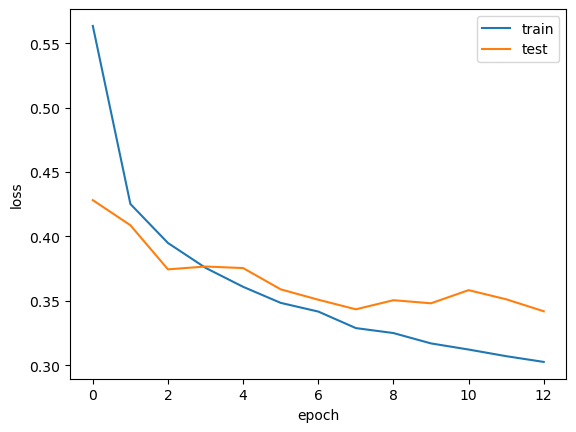

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 손실률
plt.plot(history.history['val_loss']) # 테스트 세트 손실률
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

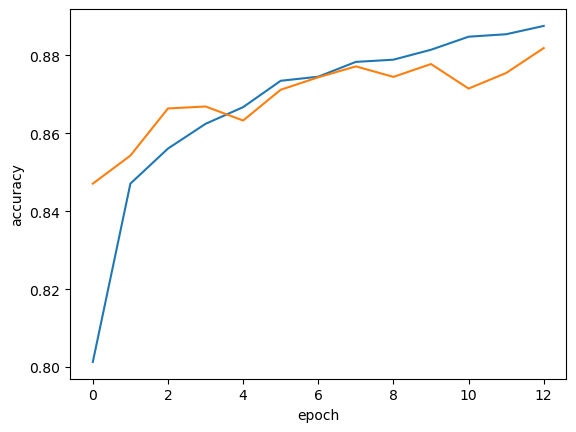

In [76]:
plt.plot(history.history['accuracy']) # 학습 세트 정확도
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [77]:
# 1. 가중치만 저장, 2. 모델 전체 저장
# model.save_weights("model.weights.h5") # h5 - HDFS - 가중치만 저장 / 이 가중치를 가지고 모델을 복구할 수 있음
# 저장해준 모델과 동일한 구성을 후 로드 // 해야지 우리가 사용할 수 있음


In [78]:
# model=model_fn(keras.layers.Dropout(0.3))

In [79]:
# model.load_weights("model.weights.h5") # 앞서 학습한 13에포크 가중치를 로드

In [80]:
# predictions = model.predict(test_scaled)

In [81]:
# import numpy as np
# np.mean(test_target == predictions.argmax(axis=1)) # 정답 1, 오답 0

In [82]:
# 2. 모델 전체 저장
model.save("model-whole.keras") # 확장자는 keras로 해야 저장됨

In [83]:
# 저장된 모델 로드
model = keras.models.load_model("model-whole.keras")

In [85]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8798 - loss: 0.3424


[0.3419867157936096, 0.8819000124931335]